In [1]:
import torch
import torchvision
import torch.nn as nn

import numpy as np 
import sklearn
import pandas as pd 
import matplotlib.pyplot as plt 
import math

USE_CUDA = torch.cuda.is_available()

In [2]:
model = torch.load("LinearReg.pth")
model

In [4]:
#读取训练数据
train_addr = "NR-Train-20.csv"
test_addr = "NR-Test-20.csv"
data = pd.read_csv(train_addr,header=None).values
x_train = torch.tensor(data[:,0])
y_train = torch.tensor(data[:,1])
data = pd.read_csv(test_addr,header=None).values
x_test = torch.tensor(data[:,0])
y_test = torch.tensor(data[:,1])

#转成列向量，-1表示自动计算，转化为len*1的相量
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [5]:
#转化为 GPU Tensor
if USE_CUDA:
    x_train = x_train.cuda()
    y_train = y_train.cuda()
    x_test = x_test.cuda()
    y_test = y_test.cuda()

In [6]:
with torch.no_grad():
    y_pred = model(x_test.float())

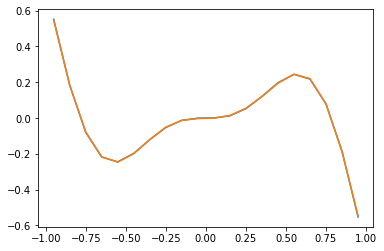

In [7]:
plt.plot(x_test.cpu(),y_test.cpu())
plt.plot(x_test.cpu(),y_pred.cpu())

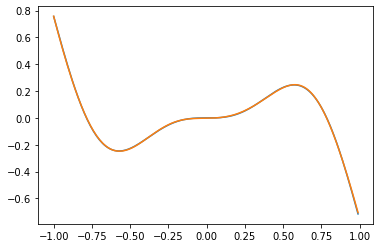

In [9]:
x = np.arange(-1,1,0.01)
y = list(map(lambda x : x*x*math.sin(4*x), x))

x = torch.tensor(x).reshape(-1,1).cuda()
y = torch.tensor(y).reshape(-1,1).cuda()

with torch.no_grad():
    y_p = model(x.float())

plt.plot(x.cpu(),y.cpu())
plt.plot(x.cpu(),y_p.cpu())